# Práctica sobre algoritmos de clasificación predictiva

<table align="right">
<tr>
<th></th>
<th>Master UOC en Inteligencia de Negocio</th>
  </tr>
  <tr>
   <td>Asignatura</td>
    <td>B2.332 Modelos Avanzados</td>
  </tr>
  <tr>
    <td>Consultor</td>
    <td>Jordi Gironés</td>
  </tr>
   <tr>
    <td>Estudiante</td>
    <td>Nombre estudiante</td>
  </tr>
   <tr>
    <td>Fecha</td>
    <td>19/10/2016</td>
  </tr>
</table>

## Introducción

El juego de datos a trabajar es libre, sin embargo para orientar mejor en la práctica proponemos el siguiente:
[Machine Learning Repository: Incendios forestales](https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/).

Deberáis utilizar código R y los paquetes `kernlab` y/o `e1071`.

Se trata de un juego de datos en formato csv que recoje medidas ambientales de distintas zonas forestales con el objetivo de predecir el riesgo de incendio.

A nivel de resumen en la práctica llevaremos a cabo las siguientes tareas:
   

#### Entregable
La práctica a entregar por parte del estudiante será este mismo documento con el siguiente índice ampliamente desarrollado:

    1.  Carga de datos y tareas de preprocesado
    2.  Optimización de los parámetros gamma y coste
    3.  Aplicación del algoritmo SVM radial, polinomial y sigmoidal
    4.  Conclusiones para SVM
    5.  Fuentes consultadas

Deberá quedar explícito que se ha trabajado y entendido el material didáctico y que soys capaces de realizar tareas de laboratorio de analítica de datos con los algoritmos estudiados.

********************************************************
### 1. Carga de datos y tareas de preprocesado
********************************************************

In [ ]:
# Descargamos el juego de datos en un directorio local.
Fires <- read.csv(file="B2.332-20161-SVM2.csv",header = TRUE, sep = ",", quote = "\"", dec = ".")

# Visualizamos la estructura del juego de datos
summary(Fires)


###### Categorización de la variable objetivo
Nuestra variable objetivo será 'area' que se corresponde con el número de hectáreas quemadas bajo las condiciones ambientales especificadas en su entrada correspondiente.

El variable area es continua y puesto que queremos realizar tareas de clasificación y no de regresión, deberemos categorizarla.
Fruto de la categorización podemos optar por trabajar con solo dos grupos (incendio, no incendio) o trabajar con varios grupos (rangos de hectareas quemadas)

In [ ]:
# Como
Fires2 <- Fires
Fires2[!Fires2[,13]==0,]$area <- 1

x <- Fires2[,1:12]
y <- factor(Fires2[,13])

#levels(factor(Fires[,13]))
#y <- cut(Fires[,13], breaks = as.numeric(c(-1,0,15,10000)))

In [ ]:
if(!require(e1071)){
    install.packages('e1071', repos='http://cran.es.r-project.org')
    require(e1071)
}

Empezamos por cargar nuestro juego de datos

In [ ]:
Fires <- read.csv(file="B2.332-20161-SVM2.csv",header = TRUE, sep = ",", quote = "\"", dec = ".")


Fires2 <- Fires
Fires2[!Fires2[,13]==0,]$area <- 1

x <- Fires2[,1:12]
y <- factor(Fires2[,13])

#levels(factor(Fires[,13]))
#y <- cut(Fires[,13], breaks = as.numeric(c(-1,0,15,10000)))


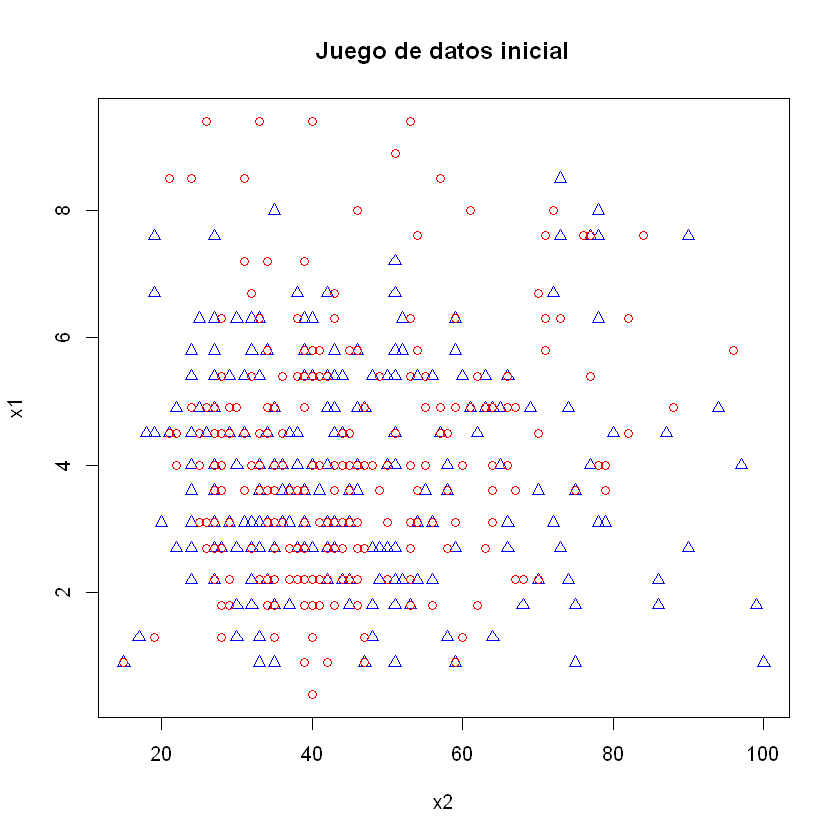

In [17]:
# Visualizamos nuestro juego de datos
plot(c(min(x[,10]), max(x[,10])),c(min(x[,11]), max(x[,11])),type='n',xlab='x2',ylab='x1')
title(main='Juego de datos inicial')
points(x[y=="0",10], x[y=="0",11], pch = 2, col="blue")
points(x[y=="1",10], x[y=="1",11], pch = 1, col="red")

In [ ]:
set.seed(1)
#Separamos los datos de las etiquetas
labels <- y
data <- x

# Utilizaremos 2/3 de los datos para entrenamiento
N=dim(data)[1]
all=seq(1,N)
id.train=sort(sample(N,N*2/3));
id.test=setdiff(all,id.train);

# Generamos el conjunto de entrenamiento:
train <- data[id.train,]
labelsTrain <- labels[id.train]
nrow(train)

# Generamos el conjunto de test:
test <- data[id.test,]
labelsTest <- labels[id.test]
nrow(test)

# Preparamos los datos de entrenamiento
trainFact=data.frame(train,y=as.factor(labelsTrain))

********************************************************
### 2. Optimización de los parámetros gamma y coste
********************************************************

In [ ]:
#tuned <- tune.svm(y~., data = trainFact, gamma = 10^(-6:-1), cost = 10^(-1:2))
#    summary(tuned)

********************************************************
### 3. Aplicación del algoritmo SVM radial, polinomial y sigmoidal
********************************************************

In [ ]:
# Generamos el modelo de clasificacion SVM polinomial de grado 3
svm.modelo=svm(y~.,data=trainFact,kernel="polynomial", degree=3, coef0=5 ,cross=5)
# Aplicamos el modelo sobre los datos test
pred1 <- predict(svm.modelo, test)
# Generamos una matriz de confusion para medir el
# grado de acierto de la prediccion
t1 <- table(pred = pred1, real = labelsTest)
t1

In [ ]:
round(100 * sum(diag(t1)) / sum(t1), digits = 2)

In [ ]:
# Resultado del modelo
summary(svm.modelo)

In [ ]:
# Visualizamos el modelo generado
#plot(svm.modelo, trainFact, wind~RH, svSymbol = 17, dataSymbol = 2)

********************************************************
### 4. Conclusiones para SVM
********************************************************